In [53]:
from lcs import *
import xgi
import numpy as np
import matplotlib.pyplot as plt

In [54]:
el = zkc(format="edgelist")
H = xgi.Hypergraph(el)
A = zkc()
n = A.shape[0]

In [55]:
gamma = 0.2
b = 0.07
contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)
x0 = np.zeros(n)
x0[0] = 1

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100, random_seed=2)

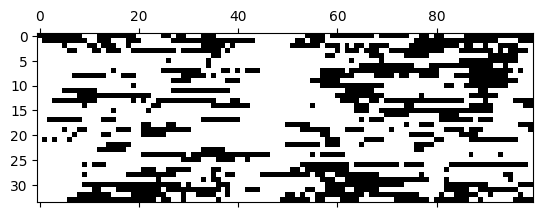

In [56]:
plt.spy(x.T)

/Users/nicholaslandry/Documents/GitHub/xgi/xgi/drawing/draw.py:472: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


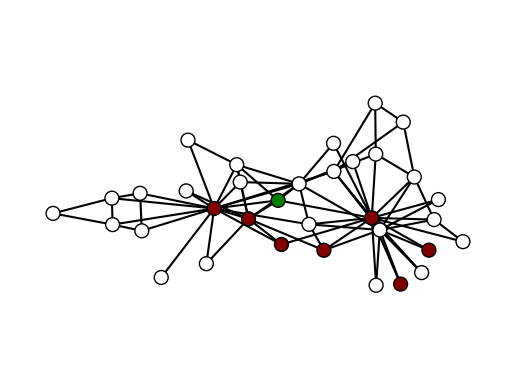

In [107]:
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=5, k=0.3))
node_fc = ["white" if x[-1, i] == 0 else "maroon" for i in H.nodes]
node_fc[12] = "green"
xgi.draw(H, pos=pos, node_size=10, node_fc=node_fc)
plt.show()

In [108]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 14, 15, 18, 20, 22, 23, 25, 29, 24, 26))

In [112]:
i = 13
nbrs = H.nodes.neighbors(i)
edgelist = [[i, j] for j in nbrs]
subH = xgi.Hypergraph(edgelist)

/Users/nicholaslandry/Documents/GitHub/xgi/xgi/drawing/draw.py:472: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


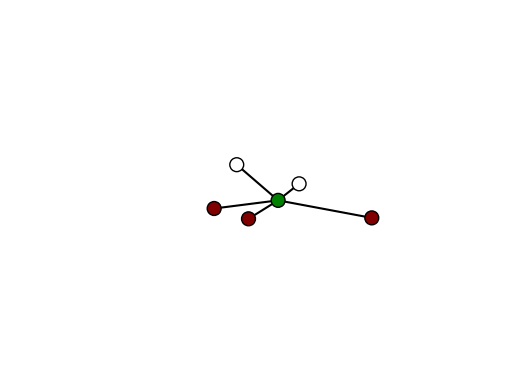

In [114]:
node_fc = ["white" if val == 0 else "maroon" for val in x[-1, subH.nodes]]
node_fc[0] = "green"
xgi.draw(subH, pos=pos, node_size=10, node_fc=node_fc)
plt.show()